In [ ]:
import pandas as pd
import servicex as sx
import awkward as ak
from func_adl_servicex import ServiceXSourceUpROOT
import matplotlib.pyplot as plt

In [ ]:
dataset_name = ["root://eospublic.cern.ch//eos/root-eos/benchmark/Run2012B_SingleMu.root"]
sx_dataset = sx.ServiceXDataset(dataset_name, "uproot")
ds = ServiceXSourceUpROOT(sx_dataset, "Events")
dimu_mass = ds.Where(lambda event: event.nMuon == 2)\
                        .Select(lambda event: Zip({'p4': Zip({'pt':   event.Muon_pt,
                                                               'eta':  event.Muon_eta,
                                                               'phi':  event.Muon_phi,
                                                               'mass': event.Muon_mass}).ToFourMomenta(),
                                                    'charge': event.Muon_charge})
                                               .Choose(2)
                                               .Where(lambda dimu: dimu[0].charge * dimu[1].charge < 0)
                                               .Select(lambda dimu: (dimu[0].p4 + dimu[1].p4).mass)).AsAwkwardArray().value()

[root://eospublic.ce...:   0%|          | 0/9000000000.0 [00:00]

        [root://eospublic.ce... Downloaded:   0%|          | 0/9000000000.0 [00:00]

In [ ]:
dimu_mass

<Array [[79.9], [2.8], ... [25.1], []] type='11135841 * var * float32'>

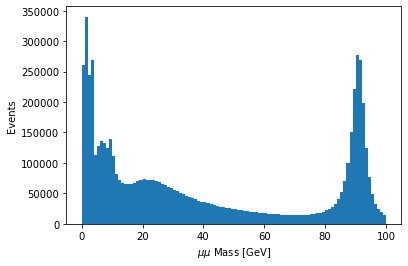

In [ ]:
plt.hist(ak.flatten(dimu_mass), bins=100, range=(0, 100))
plt.xlabel(r'$\mu\mu$ Mass [GeV]')
plt.ylabel('Events')
plt.show()